12 12
0


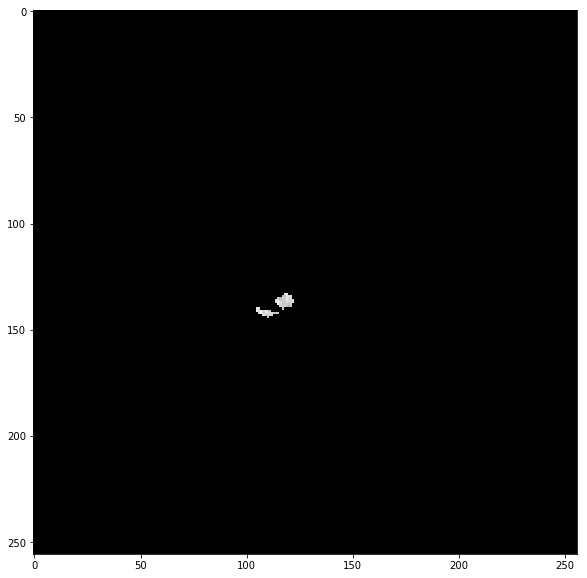

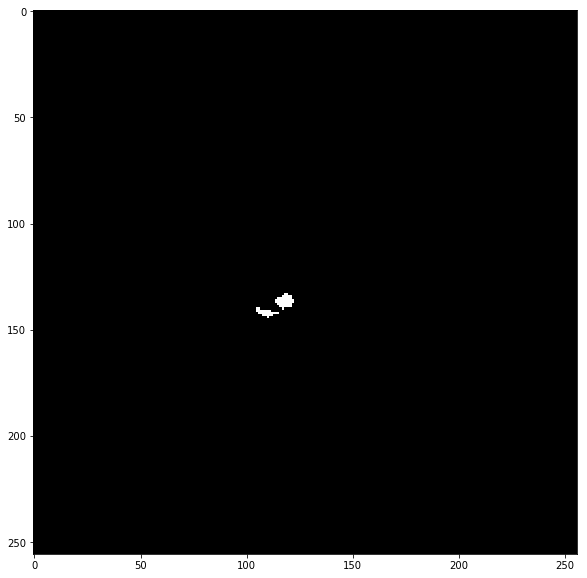

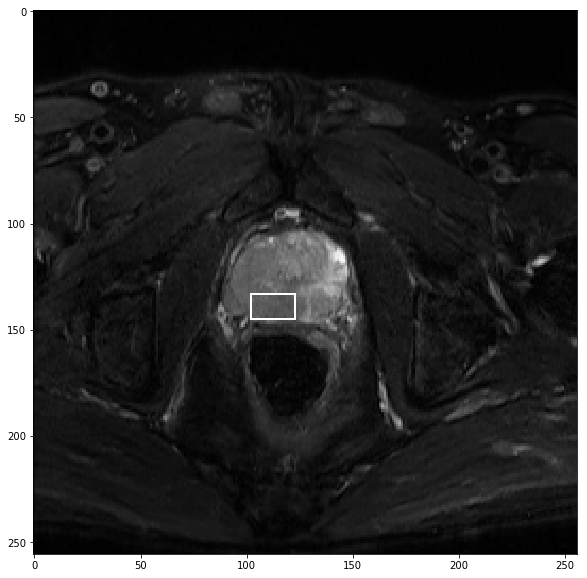

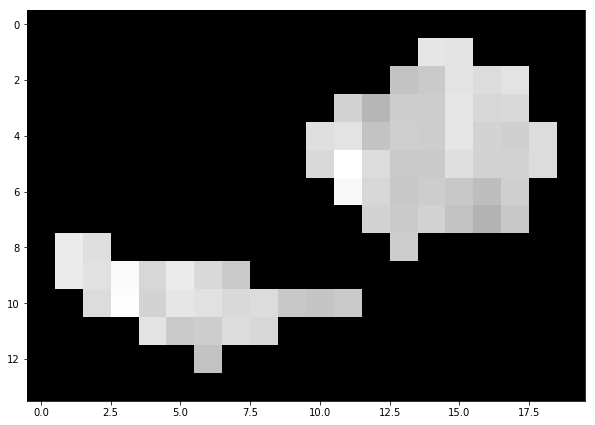

In [137]:
from glob import glob
import cv2
from scipy.misc import imsave
import numpy as np
import matplotlib.pyplot as plt
from crf import *
from skimage.measure import label, regionprops
from PIL import Image


original_imgs=sorted(glob('../T2_PCA_Seg/val/Image/*.png'))
predict_imgs=sorted(glob('./T2_Predict/*.png'))
pixel_size=256

print (len(original_imgs),len(predict_imgs))

# mask=cv2.imread(predict_imgs[0])[:,:,0]
# mask=mask/255
# # print (mask)
# print (mask.shape)
# print (np.max(mask))
# print (mask[np.where(mask<0.5)])
# img_array=cv2.resize(cv2.imread(original_imgs[0],-1),(pixel_size,pixel_size))

def plt_img(img_array,gray_style=1):
    if gray_style==1:  
        fig = plt.figure(figsize=(10, 10))
        plt.imshow(img_array,cmap=plt.cm.gray)
        plt.show()
    else:
        fig = plt.figure(figsize=(10, 10))
        plt.imshow(img_array,cmap=plt.cm.gray)
        plt.show()

def mask_over_img(img,mask):
    img_array=cv2.resize(cv2.imread(img,-1),(pixel_size,pixel_size))
    mask_array=cv2.imread(mask)[:,:,0]
    mask_array=(mask_array/255).astype('int')
    props = regionprops(mask_array.astype(int))
    prop=props[0]
    bbox=prop.bbox
#     print (list(prop))
#     print (prop['area'])

    bbox_img=img_array.copy()
    cv2.rectangle(bbox_img, (bbox[1]-3, bbox[0]), (bbox[3], bbox[2]), (255, 0, 0), 1)
    
    
#     mask_array=dense_crf(img_array,mask_array)
    print (np.min(mask_array))
    img_array[mask_array==0]=0
    crop_img=Image.fromarray(img_array)
    crop_img=crop_img.crop((bbox[1]-1,bbox[0]-1,bbox[3]+1,bbox[2]+1))
    return img_array,mask_array,bbox_img,crop_img

t=6
img_array,mask_array,bbox_img,crop_img=mask_over_img(original_imgs[t],predict_imgs[t])

plt_img(img_array)
plt_img(mask_array)
plt_img(bbox_img)
plt_img(crop_img)



In [135]:
def overlay_transparent(background_img, img_to_overlay_t, x, y, overlay_size=None):
	"""
	@brief      Overlays a transparant PNG onto another image using CV2
	
	@param      background_img    The background image
	@param      img_to_overlay_t  The transparent image to overlay (has alpha channel)
	@param      x                 x location to place the top-left corner of our overlay
	@param      y                 y location to place the top-left corner of our overlay
	@param      overlay_size      The size to scale our overlay to (tuple), no scaling if None
	
	@return     Background image with overlay on top
	"""
	
	bg_img = background_img.copy()
	
	if overlay_size is not None:
		img_to_overlay_t = cv2.resize(img_to_overlay_t.copy(), overlay_size)

	# Extract the alpha mask of the RGBA image, convert to RGB 
	b,g,r,a = cv2.split(img_to_overlay_t)
	overlay_color = cv2.merge((b,g,r))
	
	# Apply some simple filtering to remove edge noise
	mask = cv2.medianBlur(a,5)

	h, w, _ = overlay_color.shape
	roi = bg_img[y:y+h, x:x+w]

	# Black-out the area behind the logo in our original ROI
	img1_bg = cv2.bitwise_and(roi.copy(),roi.copy(),mask = cv2.bitwise_not(mask))
	
	# Mask out the logo from the logo image.
	img2_fg = cv2.bitwise_and(overlay_color,overlay_color,mask = mask)

	# Update the original image with our new ROI
	bg_img[y:y+h, x:x+w] = cv2.add(img1_bg, img2_fg)
# 	bg_img[y:y+h, x:x+w] = cv2.addWeighted(img1_bg,0.3, img2_fg,0.7,0)


	return bg_img

(640, 640, 3)
(64, 64, 3)


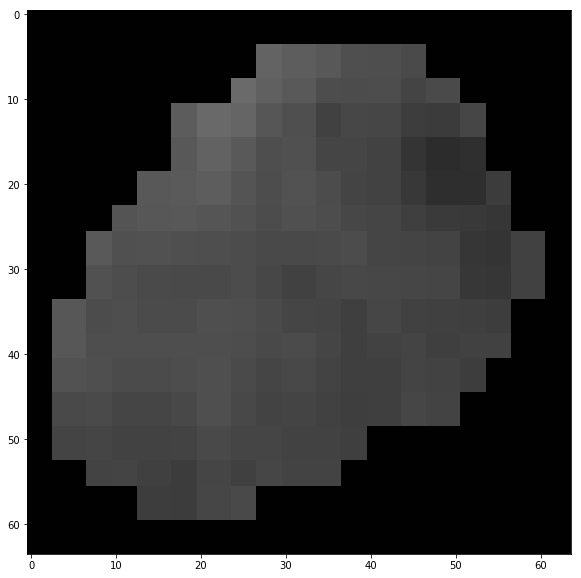

(64, 64, 4)
(64, 64, 4)


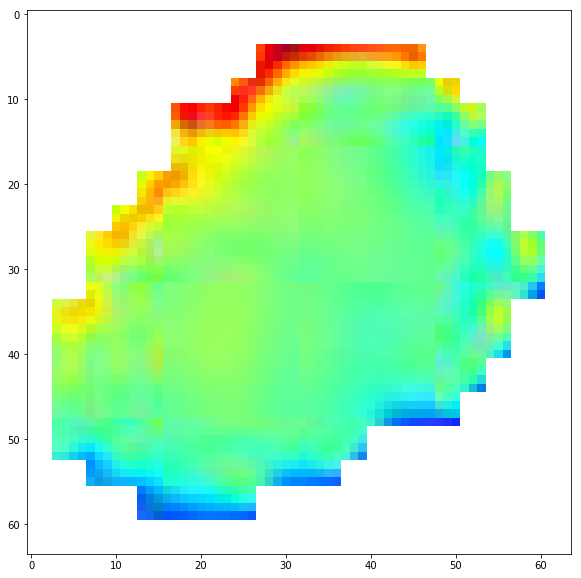

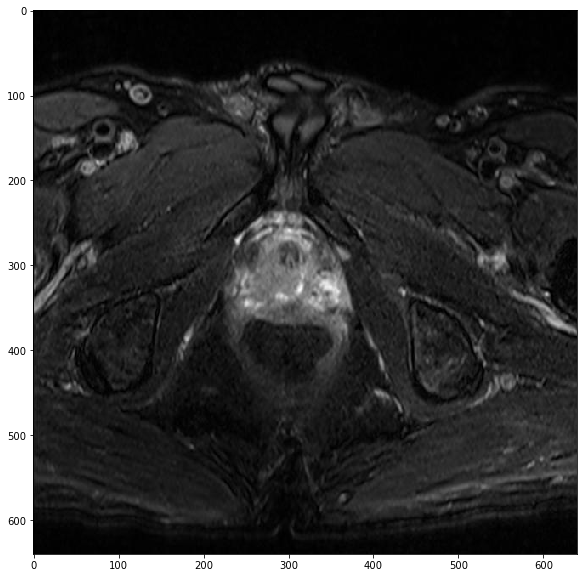

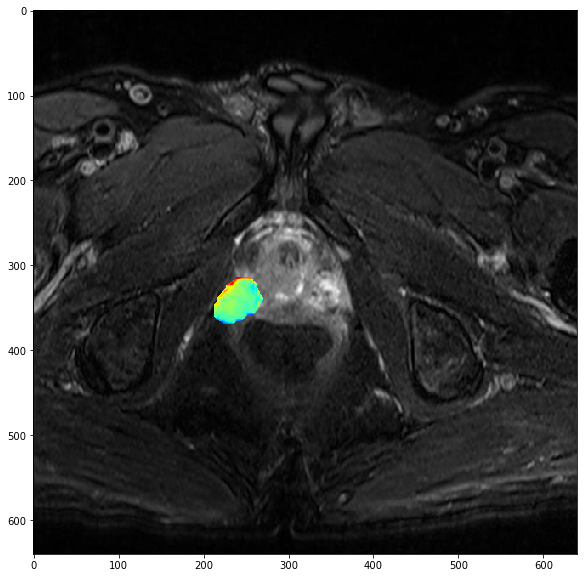

In [138]:
from PIL import Image



# b=np.zeros((64,64,4))

# print (mask_array.shape)
# a=Image.new('RGBA',(pixel_size,pixel_size))

# a[mask_array==1]=1
# plt_img(a,0)

# b=original_imgs[0]
img=original_imgs[3]
b=Image.open('./G1.jpg')
c=cv2.imread(img)
c=np.array(c)
print (c.shape)
a=Image.open('./SegImage.png')
a=a.resize((64,64))
# a=a.convert('RGBA')
a=np.array(a)
# print (a[:,:,0])
print (a.shape)
plt_img(a)
b=b.convert("RGBA")
b=np.array(b)
print (b.shape)
for i in range(b.shape[0]):
    for j in range(b.shape[1]):
        if a[i,j,0]==1:
            b[i,j,3]=0
# b=b[:,:,:3]
print (b.shape)
plt_img(b)
plt_img(c)


d=overlay_transparent(c,b,210,310)


# dst = cv2.addWeighted(a,0.5,b,0.5,0)
plt_img(d)